In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False

# 제 1절 상수계절변동일 때의 분해기법

## 1.1 승법분해모형

In [2]:
df = pd.read_csv('./data/7장 - 시계열 분해방법/표7.1-청량음료판매량자료.txt', header=None)
df.columns = ['판매량']

lst_year = []
for i in range(1, 4):
    for j in range(12):
        value = str(i) + '차년'
        lst_year.append(value)
        
lst_month = []
for i in range(3):
    for j in range(1, 13):
        lst_month.append(j)
        
df['년'] = lst_year
df['월'] = lst_month

df = df[['년', '월', '판매량']]

In [3]:
df

,년,월,판매량
0,1차년,1,113
1,1차년,2,137
2,1차년,3,149
3,1차년,4,173
4,1차년,5,156
5,1차년,6,259
6,1차년,7,396
7,1차년,8,466
8,1차년,9,549
9,1차년,10,368


### 그림 7.2

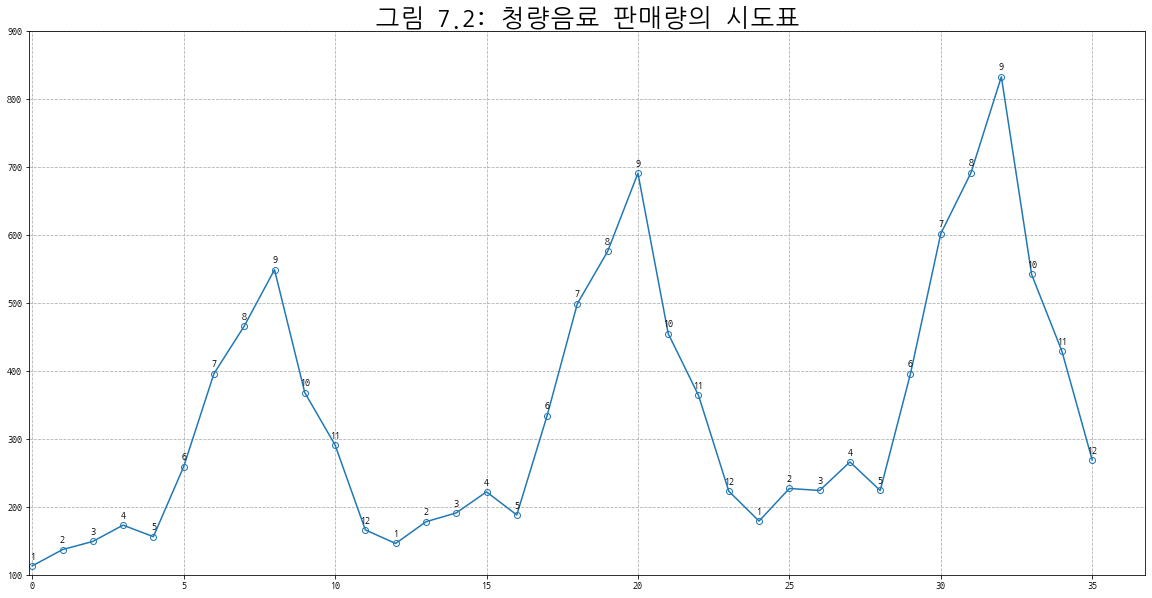

In [4]:
plt.title('그림 7.2: 청량음료 판매량의 시도표', fontsize=25)
plt.plot(df['판매량'], marker='o', markerfacecolor='none')
plt.xlim(-0.1)
plt.ylim(99.9, 900.1)
plt.grid(True, linestyle='--')

for i in range(len(df)):
    height = df['판매량'][i]
    plt.text(df.index[i], height+10, df['월'][i], ha='center')
    
plt.show()

In [5]:
df = pd.DataFrame(data=df['판매량'].values, index=pd.date_range(start='2019-1-1', periods=36, freq='MS'), columns=['판매량'])

In [6]:
df

,판매량
2019-01-01,113
2019-02-01,137
2019-03-01,149
2019-04-01,173
2019-05-01,156
2019-06-01,259
2019-07-01,396
2019-08-01,466
2019-09-01,549
2019-10-01,368


In [7]:
result = seasonal_decompose(df, model='multiplicative')

### 그림 7.4

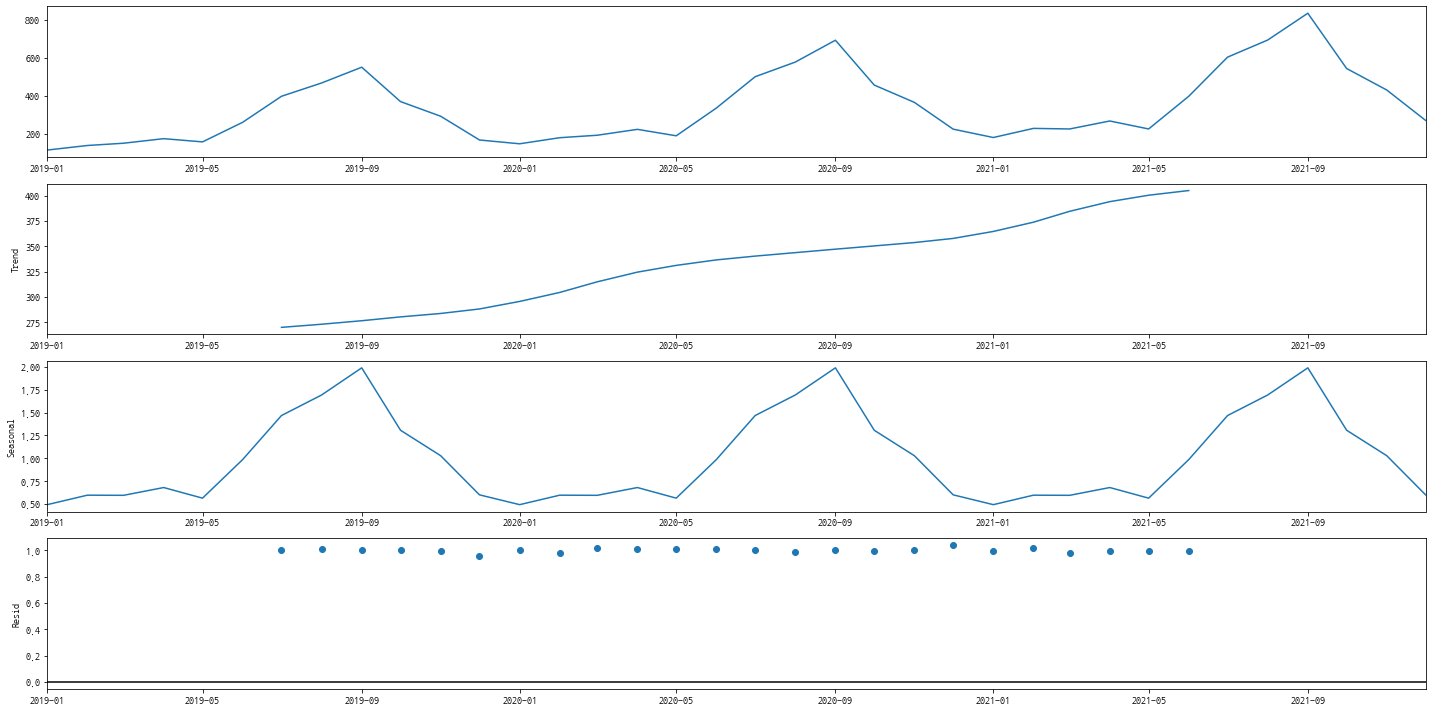

In [8]:
result.plot()
plt.show()

### 표 7.2

In [9]:
result = pd.concat([result.observed, result.seasonal, result.trend, result.resid], axis=1)
result['t'] = range(1, len(result)+1)
result = result[['t', 0, 'seasonal', 'trend', 'resid']]
result.columns = ['t', '{}'.format('$z_{t}$'), '{}'.format('$\hat S_{t}$'), '{}'.format('$\hat T_{t}$'), '{}'.format('$\hat I_{t}$')]

In [10]:
result

,t,$z_{t}$,$\hat S_{t}$,$\hat T_{t}$,$\hat I_{t}$
2019-01-01,1,113.0,0.492851,NaN,NaN
2019-02-01,2,137.0,0.596512,NaN,NaN
2019-03-01,3,149.0,0.595012,NaN,NaN
2019-04-01,4,173.0,0.680174,NaN,NaN
2019-05-01,5,156.0,0.564064,NaN,NaN
2019-06-01,6,259.0,0.985891,NaN,NaN
2019-07-01,7,396.0,1.467800,269.958333,0.999382
2019-08-01,8,466.0,1.692606,273.041667,1.008326
2019-09-01,9,549.0,1.989657,276.500000,0.997928
2019-10-01,10,368.0,1.306873,280.291667,1.004626
